### 필요 라이브러리 설치

In [2]:
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --------------------------------- ------ 8.4/10.0 MB 65.0 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.0 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 25.0 MB/s eta 0:00:00
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   --------------- ------------------------ 16.8/42.2 MB 88.3 MB/s eta 0:00:01
   --------------------------------- ------ 34.9/42.2 MB 85.2 MB/s eta 0:00:01
   ---------------------------------------- 42.2/42.2 MB 74.6 MB/s eta 0:00:00


### 필요 라이브러리 import

In [63]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


### 삼성전자 주가 가져오기

In [9]:
# https://velog.io/@choonsik_mom/ARIMA-SARIMA-auto-ARIMA%EB%A1%9C-%EC%82%BC%EC%A0%84-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0
# 김성범 교수님 arima 실습


# df = fdr.DataReader('005930', '2023-01-01', '2024-02-28')
df = fdr.DataReader('005930', '2023-03-01', '2024-03-29')
# print(df)
# df.tail(50)
# df.plot()
# fig = df['Close'].plot()

# 기간 필터링
demands = df.loc[df.index <= '2024-03-24']
demands.info()
demands

test_demands = df.loc[df.index >= '2024-03-25']
test_demands.info()
test_demands

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2023-03-02 to 2024-03-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    261 non-null    int64  
 1   High    261 non-null    int64  
 2   Low     261 non-null    int64  
 3   Close   261 non-null    int64  
 4   Volume  261 non-null    int64  
 5   Change  261 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 14.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-03-25 to 2024-03-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      int64  
 1   High    5 non-null      int64  
 2   Low     5 non-null      int64  
 3   Close   5 non-null      int64  
 4   Volume  5 non-null      int64  
 5   Change  5 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 280.0 bytes


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-03-25,79600,79800,77800,78200,18703996,-0.008872
2024-03-26,79700,80100,79200,79900,30551494,0.021739
2024-03-27,79200,80000,79200,79800,17424595,-0.001252
2024-03-28,79400,81000,79200,80800,25084812,0.012531
2024-03-29,81200,82500,80900,82400,27126366,0.019802


In [10]:
demands = demands.loc[:,'Close']
test_demands = test_demands.loc[:,'Close']

In [6]:
# # 기간 필터링
# demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14')]
# demands.info()
# demands

# test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28')]
# test_demands.info()
# test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


Date
2024-02-15    73000
2024-02-16    72800
2024-02-19    73800
2024-02-20    73300
2024-02-21    73000
2024-02-22    73100
2024-02-23    72900
2024-02-26    72800
2024-02-27    72900
2024-02-28    73200
Name: Close, dtype: int64

### 정상성 검증

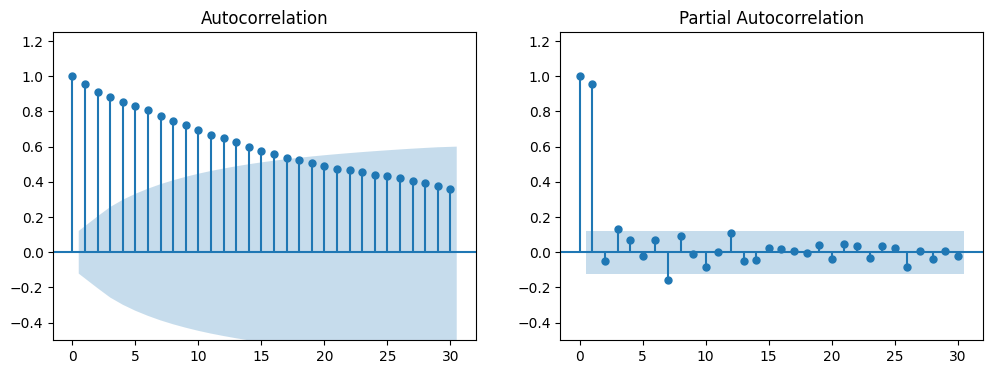

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# ACF Plot
plot_acf(demands.values, lags=30, ax=axes[0])
# PACF Plot
plot_pacf(demands.values, lags=30, ax=axes[1])

for ax in axes:
    ax.set_ylim(-0.5, 1.25)
plt.show()

In [12]:
# 1차 차분에 대한 결과
diff = 1
diff_1 = demands.diff(periods=diff).iloc[diff:]
# diff_1.values

In [17]:
from statsmodels.tsa.stattools import kpss
    
stats, p_value, nlags, critical_values = kpss(demands.values, nlags=30)
    
print(f'KPSS Stat: {stats:.5f}')
print(f'p-value: {p_value:.2f}') # p-value > 0.05 -> 정상성
print(f'Lags: {nlags}')

KPSS Stat: 0.71610
p-value: 0.01
Lags: 30


### arima 모델 학습

In [64]:
model = ARIMA(demands.values[-5:], order=(2, 2, 5)) # BEST
model = ARIMA(demands.values[-5:], order=(2, 2, 5)) # BEST

# model = ARIMA(demands.values[100:], order=(0, 0, 0)) #, trend='t') # 

model_fit = model.fit()
# model_fit = model.fit(trend = 'c', full_output = True, disp = True)

# print(model_fit.summary())
pred = model_fit.get_forecast(steps=len(test_demands))
# print(pred)
print(pred.predicted_mean)

# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]
# print(test_demands.index)

fig = model_fit.plot_predict()



[79756.98343694 80299.44192413 80898.86335466 81484.30199925
 82072.3111188 ]
[78200, 79900, 79800, 80800, 82400]


AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

### 결과 시각화

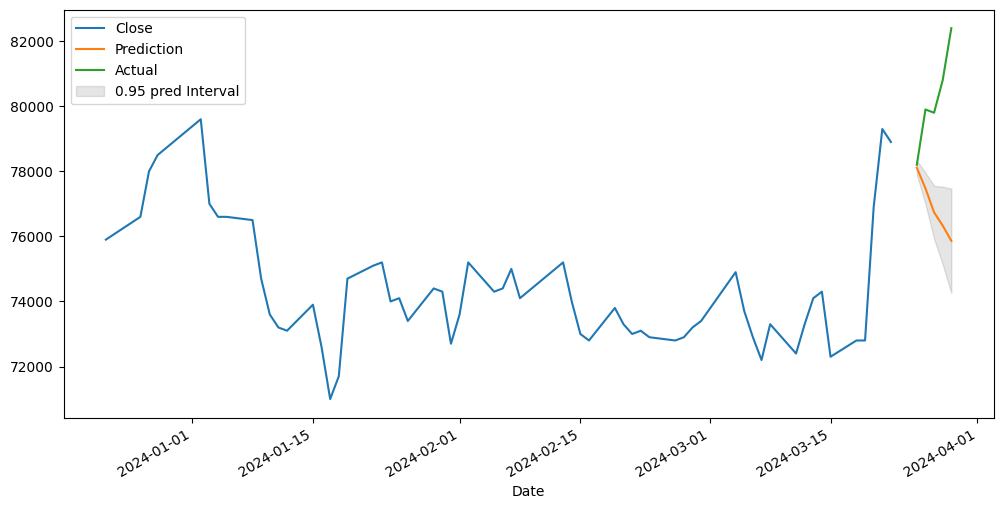

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(60).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.90)[:,0], pred.conf_int(alpha=0.90)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

### hyperparameter 튜닝

In [130]:
import itertools

p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
trend = ['n', 'c', 't', 'ct']

AIC = []
for i in pdq :
    for t in trend:
        try:
            model = ARIMA(demands.values[0:], order=(i), trend=t)
            model_fit = model.fit()
            print(f'ARIMA pdq : {i} {t}>> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
        except:
            print('err')

ARIMA pdq : (0, 0, 0) n>> AIC : 6565.81
ARIMA pdq : (0, 0, 0) c>> AIC : 5099.22
ARIMA pdq : (0, 0, 0) t>> AIC : 7352.57
ARIMA pdq : (0, 0, 0) ct>> AIC : 4845.5
ARIMA pdq : (0, 0, 1) n>> AIC : 6213.95
ARIMA pdq : (0, 0, 1) c>> AIC : 4822.53
ARIMA pdq : (0, 0, 1) t>> AIC : 5813.9
ARIMA pdq : (0, 0, 1) ct>> AIC : 4607.94
ARIMA pdq : (0, 0, 2) n>> AIC : 5975.54
ARIMA pdq : (0, 0, 2) c>> AIC : 4620.91


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (0, 0, 2) t>> AIC : 5511.59
ARIMA pdq : (0, 0, 2) ct>> AIC : 4465.38
ARIMA pdq : (0, 1, 0) n>> AIC : 4299.27
err
ARIMA pdq : (0, 1, 0) t>> AIC : 4299.84
err
ARIMA pdq : (0, 1, 1) n>> AIC : 4301.26
err
ARIMA pdq : (0, 1, 1) t>> AIC : 4301.79
err
ARIMA pdq : (0, 1, 2) n>> AIC : 4303.25
err
ARIMA pdq : (0, 1, 2) t>> AIC : 4303.78
err
ARIMA pdq : (0, 2, 0) n>> AIC : 4457.48
err
err
err
ARIMA pdq : (0, 2, 1) n>> AIC : 4432.93
err
err
err
ARIMA pdq : (0, 2, 2) n>> AIC : 4428.15
err
err
err
ARIMA pdq : (1, 0, 0) n>> AIC : 4326.43
ARIMA pdq : (1, 0, 0) c>> AIC : 4322.33
ARIMA pdq : (1, 0, 0) t>> AIC : 4326.68
ARIMA pdq : (1, 0, 0) ct>> AIC : 4314.3
ARIMA pdq : (1, 0, 1) n>> AIC : 4328.26
ARIMA pdq : (1, 0, 1) c>> AIC : 4323.96
ARIMA pdq : (1, 0, 1) t>> AIC : 4328.58
ARIMA pdq : (1, 0, 1) ct>> AIC : 4315.41
ARIMA pdq : (1, 0, 2) n>> AIC : 4326.72
ARIMA pdq : (1, 0, 2) c>> AIC : 4323.0


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (1, 0, 2) t>> AIC : 4326.72
ARIMA pdq : (1, 0, 2) ct>> AIC : 4315.49
ARIMA pdq : (1, 1, 0) n>> AIC : 4301.26
err
ARIMA pdq : (1, 1, 0) t>> AIC : 4301.79
err
ARIMA pdq : (1, 1, 1) n>> AIC : 4303.26
err
ARIMA pdq : (1, 1, 1) t>> AIC : 4302.92
err
ARIMA pdq : (1, 1, 2) n>> AIC : 4304.71
err
ARIMA pdq : (1, 1, 2) t>> AIC : 4304.71
err
ARIMA pdq : (1, 2, 0) n>> AIC : 4438.2
err
err
err
ARIMA pdq : (1, 2, 1) n>> AIC : 4419.7
err
err
err
ARIMA pdq : (1, 2, 2) n>> AIC : 4423.82
err
err
err
ARIMA pdq : (2, 0, 0) n>> AIC : 4328.36
ARIMA pdq : (2, 0, 0) c>> AIC : 4324.05
ARIMA pdq : (2, 0, 0) t>> AIC : 4328.6
ARIMA pdq : (2, 0, 0) ct>> AIC : 4315.59
ARIMA pdq : (2, 0, 1) n>> AIC : 4329.76
ARIMA pdq : (2, 0, 1) c>> AIC : 4325.26
ARIMA pdq : (2, 0, 1) t>> AIC : 4336.66
ARIMA pdq : (2, 0, 1) ct>> AIC : 4316.77


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (2, 0, 2) n>> AIC : 4331.68
ARIMA pdq : (2, 0, 2) c>> AIC : 4324.58


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (2, 0, 2) t>> AIC : 4331.43
ARIMA pdq : (2, 0, 2) ct>> AIC : 4317.32
ARIMA pdq : (2, 1, 0) n>> AIC : 4303.28
err
ARIMA pdq : (2, 1, 0) t>> AIC : 4303.8
err
ARIMA pdq : (2, 1, 1) n>> AIC : 4304.71
err
ARIMA pdq : (2, 1, 1) t>> AIC : 4304.7
err
ARIMA pdq : (2, 1, 2) n>> AIC : 4306.8
err
ARIMA pdq : (2, 1, 2) t>> AIC : 4306.9
err
ARIMA pdq : (2, 2, 0) n>> AIC : 4438.47
err
err
err


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (2, 2, 1) n>> AIC : 4421.59
err
err
err
ARIMA pdq : (2, 2, 2) n>> AIC : 4423.7
err
err
err


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 평가

In [48]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


print('MSE:', MSE(pred.predicted_mean, test_demands.to_list()))
print('MAE:', MAE(pred.predicted_mean, test_demands.to_list()))
print('MAPE:', MAPE(pred.predicted_mean, test_demands.to_list()))

MSE: 780948.8701484274
MAE: 685.4013516951848
MAPE: 0.008555927396722302


### 추가 samrima, auto arima

c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[79098.4261262  79216.6583144  79360.61050666 79368.22332602
 79280.32130681]


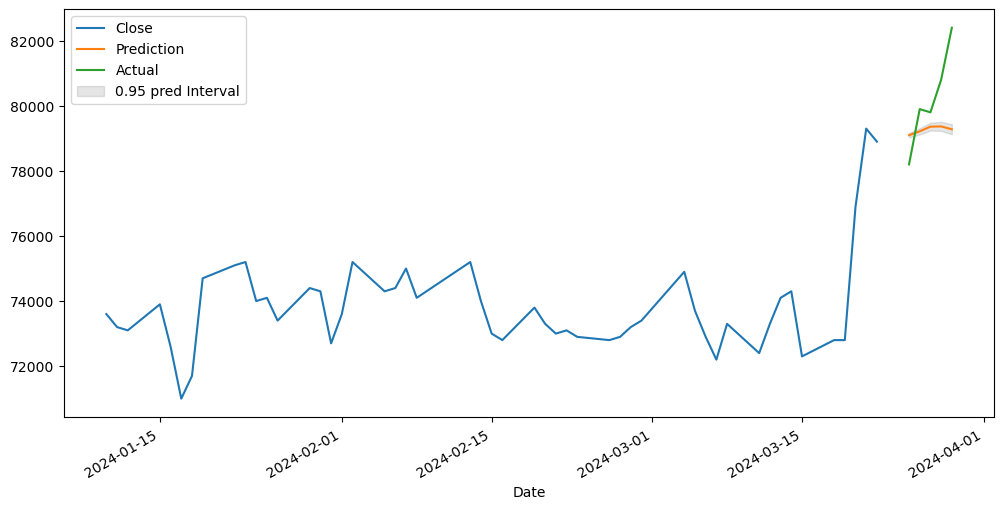

In [139]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = ARIMA(demands[200:].values, order=(5, 1, 2))
# model = SARIMAX(demands.values, 
#                 order=(2, 1, 3), 
#                 season_order = (2, 1, 2, 3)).fit(disp=False)
model_fit = model.fit()
# print(model_fit.summary())

pred = model_fit.get_forecast(steps=len(test_demands))
# pred = model_fit.predict(start=1)

# pred = auto_arima_model.predict(len(test_demands), return_conf_int=True)
# print(pred)
print(pred.predicted_mean)
# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
# print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(50).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.95)[:,0], pred.conf_int(alpha=0.95)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

In [238]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 41.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------  2.8/2.8 MB 59.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 44.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 75.1 MB/s eta 0:00:00


In [239]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(demands.values, start_p=1, start_q=1, 
                             max_p=3, max_1=3, m=3, seasonal=True, # sarima(seasonal=True)
                             d=1, D=1,
                             max_P=3, max_Q=3, 
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True, 
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[3]             : AIC=8772.288, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=8681.081, Time=0.97 sec
 ARIMA(0,1,0)(0,1,2)[3]             : AIC=8662.806, Time=1.83 sec
 ARIMA(0,1,0)(0,1,3)[3]             : AIC=8664.668, Time=2.49 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=8716.247, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=8664.349, Time=1.53 sec
 ARIMA(0,1,0)(1,1,2)[3]             : AIC=8664.496, Time=3.00 sec
 ARIMA(0,1,0)(1,1,3)[3]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=8683.862, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=8665.669, Time=1.55 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=8668.173, Time=3.28 sec
 ARIMA(0,1,0)(2,1,3)[3]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(3,1,0)[3]             : AIC=8668.480, Time=1.30 sec
 ARIMA(0,1,0)(3,1,1)[3]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,0)(3,1,2)[3]             : AIC=inf, Time=4.40 sec
 ARIMA(0,1,1)(0,1,0)[3]       

In [119]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)

ses_1 = SimpleExpSmoothing(demands).fit(smoothing_level=0.2)
# test_length = 예측하고자 하는 기간
ses_forecast_1 = ses_1.forecast(len(test_demands))
print(ses_forecast_1)

261    75736.512128
262    75736.512128
263    75736.512128
264    75736.512128
265    75736.512128
dtype: float64


c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return 

In [120]:
hs_3 = Holt(demands, exponential = False, damped = True).fit(damping_slope = 0.99)
hs_forecast_3 = hs_3.forecast(len(test_demands))
hs_forecast_3

hs_2 = Holt(demands, exponential = True).fit()
hs_forecast_2 = hs_2.forecast(len(test_demands))
hs_forecast_2

C:\Users\KwanhoKIm\AppData\Local\Temp\ipykernel_20188\1926448922.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hs_3 = Holt(demands, exponential = False, damped = True).fit(damping_slope = 0.99)
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\pandas\util\_decorators.py:210: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
c:\ProgramData\anaconda3\envs\class_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\envs\class_3\lib\s

261    79035.931606
262    79169.778457
263    79303.851976
264    79438.152549
265    79572.680559
dtype: float64

In [121]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print('MSE:', MSE(hs_forecast_2, test_demands.to_list()))
print('MAE:', MAE(hs_forecast_2, test_demands.to_list()))
print('MAPE:', MAPE(hs_forecast_2, test_demands.to_list()))

MSE: 2265306.3433219
MAE: 1250.2936129923764
MAPE: 0.01574623178230878
